In [1]:
# importing basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# importing WordCloud for text visualization

from wordcloud import WordCloud

In [5]:
# importing natural language toolkit for nlp
import nltk
from nltk.corpus import stopwords

In [7]:
# downloading nltk data
nltk.download("stopwords")
nltk.download("punkt")    # downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# read the csv file
df = pd.read_csv("spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [29]:
df.drop(columns=["Unnamed: 2","Unnamed: 3" , "Unnamed: 4"], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# rename the colums name 
df.rename(columns={"v1":"target" , "v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing ###

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# shape
df.shape

(5572, 2)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [34]:
df.duplicated().sum()

np.int64(403)

In [36]:
df=df.drop_duplicates(keep="first")
df.shape

(5169, 2)

### Feature Engineering 

In [39]:
# importing the Porter stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

ps = PorterStemmer()

# lower case transformation and text preprocessing funtion
def transform_text(text):
    text = text.lower()

    # tokenization using nltk 
    text = nltk.word_tokenize(text)

    # removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stop words and punctuation
    text = y[:]
    y.clear()

    # Loop throug the tokens and remove stopwords and puunctuation
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    # stemming using Porter stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Joining the processed token back into a single string
    return " ".join(y)

In [40]:
sample = "Running runners run! It's amazing, isn't it?"
print(transform_text(sample))

run runner run amaz


In [41]:
df["transormed_text"] = df['text'].apply(transform_text)
df.head()

,target,text,transormed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [44]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfid = TfidfVectorizer(max_features=1000)

In [47]:
X= tfid.fit_transform(df['transormed_text']).toarray()
y = df['target'].values

    

In [48]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.20 , random_state = 2 )

### Model Training

In [49]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 1.0/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 1.6/150.0 MB 2.6 MB/s eta 0:00:57
    --------------------------------------- 2.1/150.0 MB 2.8 MB/s eta 0:00:53
    --------------------------------------- 2.9/150.0 MB 2.7 MB/s eta 0:00:56
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0:01:02
    --------------------------------------- 3.1/150.0 MB 2.4 MB/s eta 0

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel="sigmoid" , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = "liblinear" , penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators= 50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators = 50 , random_state = 2 )


In [58]:
clfs = {
    "SVC": svc ,
    "KNN": knc , 
    "NB": mnb , 
    "DT": dtc , 
    "LR": lrc , 
    "RF":rfc ,
    "Adaboost": abc , 
    "Bgc": bc , 
    "ETC": etc ,
    "GBDT": gbc , 
    "xgb": xgb} 


### Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score , precision_score
# Training function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=0)  # You can change average='macro' if multiclass
    return accuracy, precision


In [60]:
accuracies = []
precisions = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"\nFor: {name}")
    print("Accuracy :", current_accuracy)
    print("Precision:", current_precision)

    accuracies.append(current_accuracy)
    precisions.append(current_precision)




For: SVC
Accuracy : 0.971953578336557
Precision: 0.9658119658119658

For: KNN
Accuracy : 0.9177949709864603
Precision: 1.0

For: NB
Accuracy : 0.97678916827853
Precision: 0.9913793103448276

For: DT
Accuracy : 0.9390715667311412
Precision: 0.8571428571428571

For: LR
Accuracy : 0.9622823984526112
Precision: 0.9626168224299065

For: RF
Accuracy : 0.9709864603481625
Precision: 0.9426229508196722

For: Adaboost
Accuracy : 0.9245647969052224
Precision: 0.8488372093023255

For: Bgc
Accuracy : 0.965183752417795
Precision: 0.8923076923076924

For: ETC
Accuracy : 0.9787234042553191
Precision: 0.9603174603174603

For: GBDT
Accuracy : 0.9555125725338491
Precision: 0.9423076923076923

For: xgb
Accuracy : 0.9738878143133463
Precision: 0.9586776859504132


C:\Users\USER\AppData\Local\Temp\ipykernel_23736\2022101211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classifier_names, y=accuracies, palette="viridis")


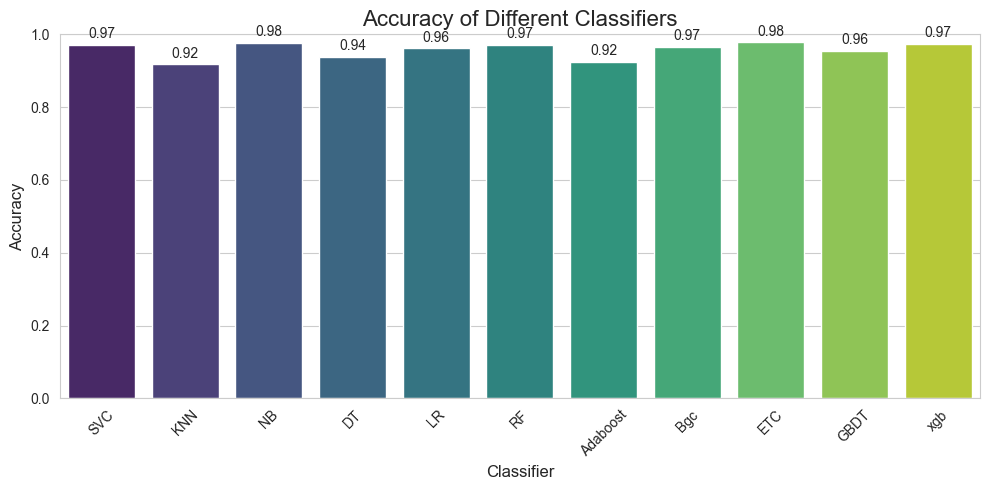

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of classifier names and their corresponding accuracies
classifier_names = list(clfs.keys())

# Set the plot size and style
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

# Create the barplot
sns.barplot(x=classifier_names, y=accuracies, palette="viridis")

# Add titles and labels
plt.title("Accuracy of Different Classifiers", fontsize=16)
plt.xlabel("Classifier", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)

# Annotate each bar with the accuracy value
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
